In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('data (전체).csv')

def parse_time(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

df['time'] = df['time'].apply(parse_time)

In [ ]:
df

,date,time,entire_num,center_num,bottom_num,right_num
0,2023-05-12,39703,2,1,0,0
1,2023-05-12,39704,2,1,0,0
2,2023-05-12,39705,2,1,0,0
3,2023-05-12,39706,2,1,0,0
4,2023-05-12,39707,2,1,0,0
...,...,...,...,...,...,...
23216,2023-05-19,63341,7,0,6,1
23217,2023-05-19,63342,7,0,6,1
23218,2023-05-19,63343,6,0,6,0
23219,2023-05-19,63344,7,0,7,0


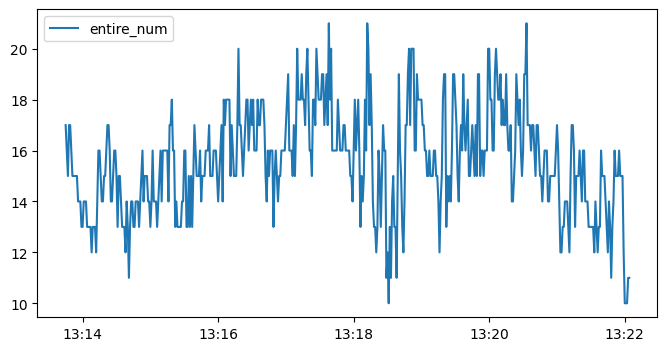

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter, MinuteLocator
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
from matplotlib import rcParams
from sklearn.preprocessing import RobustScaler

rcParams['figure.figsize'] = 8,4

start_index = 7500
end_index = 8000

fig, ax = plt.subplots()

# y축의 값을 정수로 표현하도록 설정
#set_major_locator : 주 눈금의 위치를 조정
#MaxNLocator : 눈금의 최대 개수 제한, 정수 위치에만 표시
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# x축의 값을 datetime 형태로 변환
x_values_seconds = np.array(df.time[start_index:end_index])
x_values_time = [timedelta(seconds=int(s)) for s in x_values_seconds]

x_values_datetime = [datetime(1900, 1, 1) + t for t in x_values_time]

#[13:13:45, 13:13:46, 13:13:47 ...]

# x축에 분 단위로 표시
minutes = MinuteLocator(interval = 2)
m_fmt = DateFormatter('%H:%M')

ax.xaxis.set_major_locator(minutes)
ax.xaxis.set_major_formatter(m_fmt)

plt.plot(x_values_datetime, df['entire_num'].values[start_index:end_index], label='entire_num')
plt.legend(loc='upper left')
plt.show()


In [ ]:
from scipy.ndimage import gaussian_filter1d

sigma = 10  #6, 10
smoothed = gaussian_filter1d(df['entire_num'], sigma)  # Window size 5, polynomial order 3
df['entire_num_MA_Smooth'] = smoothed

In [ ]:
print(df)

             date   time  entire_num  center_num  bottom_num  right_num  \
0      2023-05-12  39703           2           1           0          0   
1      2023-05-12  39704           2           1           0          0   
2      2023-05-12  39705           2           1           0          0   
3      2023-05-12  39706           2           1           0          0   
4      2023-05-12  39707           2           1           0          0   
...           ...    ...         ...         ...         ...        ...   
23216  2023-05-19  63341           7           0           6          1   
23217  2023-05-19  63342           7           0           6          1   
23218  2023-05-19  63343           6           0           6          0   
23219  2023-05-19  63344           7           0           7          0   
23220  2023-05-19  63345           7           0           7          0   

       entire_num_MA_Smooth  
0                         2  
1                         2  
2        

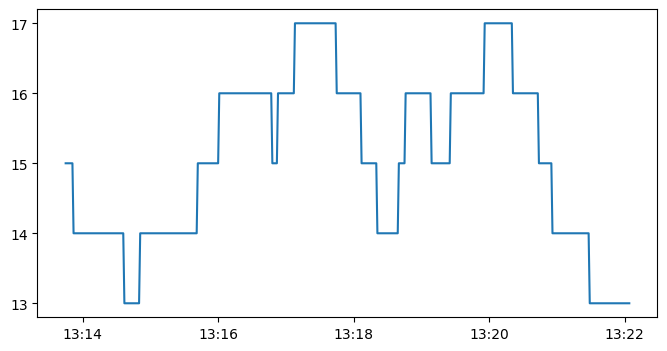

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

start_index = 7500
end_index = 8000

fig, ax = plt.subplots()



# y축의 값을 정수로 표현하도록 설정
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# x축의 값을 3600으로 나눈 값으로 표현하도록 설정
x_values = np.array(df.time[start_index:end_index]) / 3600

# x축에 분 단위로 표시
minutes = MinuteLocator(interval = 2)
m_fmt = DateFormatter('%H:%M')

ax.xaxis.set_major_locator(minutes)
ax.xaxis.set_major_formatter(m_fmt)



# x_values를 분 단위로 변환
x_values_minutes = x_values * 60

# x축에 분:초 형식으로 표시
formatter = DateFormatter('%H:%M')

ax.xaxis.set_major_formatter(formatter)

plt.plot(x_values_datetime, df['entire_num_MA_Smooth'].values[start_index:end_index])
plt.show()

In [ ]:
count = 0

for i in range(len(df)-2):
  diff1 = df['entire_num_MA_Smooth'][i+1] - df['entire_num_MA_Smooth'][i]
  diff2 = df['entire_num_MA_Smooth'][i+2] - df['entire_num_MA_Smooth'][i+1]

  if abs(diff1) >=1 and abs(diff2) >=1:
    count +=1

print(count)

0


In [ ]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt

#setting figure size
from matplotlib.pylab import rcParams

#for normalizing data
from sklearn.preprocessing import MinMaxScaler

#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

from tensorflow.keras.losses import MeanSquaredLogarithmicError

#차트의 기본 크기를 설정합니다.
rcParams['figure.figsize'] = 8,4 #그림(figure)의 크기. (가로,세로) 인치 단위

data = df

#creating dataframe

new_data = data[['entire_num_MA_Smooth', 'center_num', 'bottom_num', 'right_num']].copy()

##new_data = data[['time', 'entire_num', 'center_num', 'bottom_num', 'right_num']].copy()

##new_data['time'] = new_data['time'].apply(parse_time)

print(new_data)


       entire_num_MA_Smooth  center_num  bottom_num  right_num
0                         2           1           0          0
1                         2           1           0          0
2                         2           1           0          0
3                         2           1           0          0
4                         2           1           0          0
...                     ...         ...         ...        ...
23216                     6           0           6          1
23217                     6           0           6          1
23218                     6           0           6          0
23219                     6           0           7          0
23220                     6           0           7          0

[23221 rows x 4 columns]


[[5 0 4 1]
 [5 0 4 1]
 [5 0 4 1]
 ...
 [6 0 6 0]
 [6 0 7 0]
 [6 0 7 0]]
       entire_num_MA_Smooth  center_num  bottom_num  right_num
0                 -0.166667         0.0   -0.333333  -0.333333
1                 -0.166667         0.0   -0.333333  -0.333333
2                 -0.166667         0.0   -0.333333  -0.333333
3                 -0.166667         0.0   -0.333333  -0.333333
4                 -0.166667         0.0   -0.333333  -0.333333
...                     ...         ...         ...        ...
15475              0.333333        -0.5    1.000000   0.000000
15476              0.333333        -0.5    1.000000   0.000000
15477              0.333333        -0.5    1.000000   0.000000
15478              0.333333        -0.5    1.000000   0.000000
15479              0.333333        -0.5    1.000000   0.000000

[15480 rows x 4 columns]
(15480, 4)
Epoch 1/3
1528/1528 [==============================] - 26s 15ms/step - loss: 0.1067
Epoch 2/3
1528/1528 [==============================

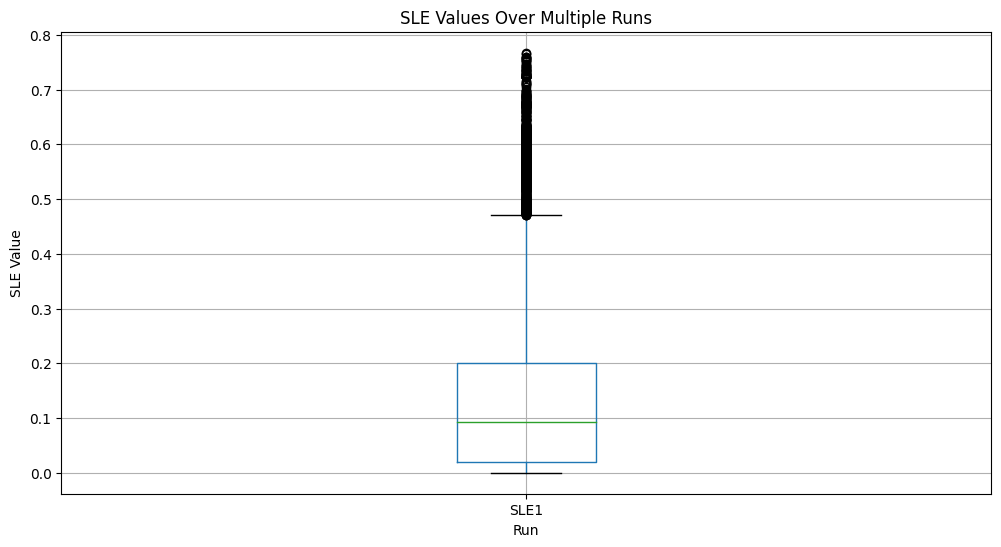

In [ ]:


#time열 제거 minmaxscaler사용x 이후 다시 합친다.

dataset = new_data.values

train_len = (len(dataset)*2)//3

train = dataset[0:train_len,:]
train = pd.DataFrame(train, columns = new_data.columns)
valid = dataset[train_len:,:]

print(valid)

#값을 0 ~ 1 사이의 값으로 변환 합니다
robust_scaler = RobustScaler()
scaled_data = robust_scaler.fit_transform(train)


# # 'entire_num' 열만 스케일링하는 스케일러 생성
# scaler_entire_num = MinMaxScaler(feature_range=(0, 1))
# scaled_entire_num = scaler_entire_num.fit_transform(train[['entire_num_MA_Smooth']])

scaled_data = pd.DataFrame(scaled_data, columns = new_data.columns)

print(scaled_data)
print(scaled_data.shape)  #(15480, 4)

time_window = 200
prediction_time = 1200

x_train, y_train = [], []
for i in range(time_window,len(train)):
    x_train.append(scaled_data.iloc[i-time_window:i+1,0:4])
    y_train.append(new_data.iloc[i+prediction_time,0])

y_train = np.array(y_train).reshape(-1,1)
scaler_y = RobustScaler()
scaled_y_train = scaler_y.fit_transform(y_train.reshape(-1,1))

y_train = scaled_y_train

# x_train [0:time_window]=>0:59까지데이터 y_train [time_window]
x_train, y_train = np.array(x_train), np.array(y_train)


# SLE 값을 저장할 빈 DataFrame 초기화
SLE_df = pd.DataFrame()

def letsPredict(iteration, loss_function = MeanSquaredLogarithmicError(), epochs = 3, batch_size = 10, time_window = 200, prediction_time = 1200):
  global SLE_df


  # create and fit the LSTM network
  model = Sequential()
  # x_train.shape[1] 이것은 timestep이 된다
  model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
  model.add(LSTM(units=100))
  model.add(Dense(1))

  loss_function = MeanSquaredLogarithmicError()

  model.compile(loss = loss_function, optimizer='adam')
  #model.fit(x_train, y_train, epochs=1, batch_size=1000, verbose=1) #epdochs =3 , batch_size = 10

  model.fit(x_train, y_train, epochs=3, batch_size=10, verbose=1) #epdochs =3 , batch_size = 10

  # 입력 데이터중 마지막 데이터를 가지고 valid 데이터를 만듭니다.
  inputs_noscale = valid
  inputs_noscale_df = pd.DataFrame(inputs_noscale, columns=new_data.columns)

  scaled_inputs = robust_scaler.transform(inputs_noscale_df)

  inputs = pd.DataFrame(scaled_inputs, columns=new_data.columns)

  X_test = []
  for i in range(time_window,len(inputs)-prediction_time):
      X_test.append(inputs.iloc[i-time_window:i+1, :])


  X_test = np.array(X_test)

  predicted_values = model.predict(X_test)
  predicted_values = scaler_y.inverse_transform(predicted_values)

  predicted_values[predicted_values < 0] = 0

  valid_entire_num = valid[len(valid) - len(predicted_values):, 0]  # Assuming 'entire_num' is the second column

  SLE = np.square(np.log1p(valid_entire_num) - np.log1p(predicted_values.flatten()))

  # SLE를 DataFrame으로 변환하고 CSV 파일에 저장
  column_name = f'SLE{iteration + 1}'
  SLE_df[column_name] = SLE

  #MSLE 계산 및 출력
  MSLE = np.mean(SLE)  # Flatten 'POP' to make it a 1D array
  print(f"MSLE {iteration +1 } : ", MSLE)

for i in range(2):
  letsPredict(iteration = i)

# 모든 반복이 끝난 후에 DataFrame을 CSV 파일로 저장
SLE_df.to_csv('SLE_values.csv', index=False)

# CSV 파일 읽기
data = pd.read_csv('SLE_values.csv')

# 박스플롯으로 시각화
plt.figure(figsize=(12, 6))
data.boxplot()
plt.title("SLE Values Over Multiple Runs")
plt.xlabel("Run")
plt.ylabel("SLE Value")
plt.show()

In [ ]:
#SLE 값들이 저장된 CSV 파일 읽기
data = pd.read_csv('SLE_values.csv')

#각 SLE 열에 대한 통계 저장을 위한 DataFrame 생성
statistics_df = pd.DataFrame(columns = ['Column', 'Mean','Median', 'Upper 25%', 'Lower 25%', 'Number of Outliers'])

#각 SLE 열에 대한 통계를 계산
for column in data.columns:
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  print(Q3)
  IQR = Q3-Q1
  lower_bound = Q1- 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  is_outlier = (data[column] <lower_bound) | (data[column] > upper_bound)
  num_outliers = is_outlier.sum()

  #통계 정보를 DataFrame에 추가
  statistics_df = statistics_df.append({
      'Column': column,
      'Mean':data[column].mean(),
      'Median': data[column].median(),
      'Upper 25%': Q3,
      'Lower 25%' : Q1,
      'Number of Outliers' : num_outliers
  },ignore_index = True)

# 통계 DataFrame을 CSV 파일로 저장
statistics_df.to_csv('SLE_statistics.csv', index = False)

0.1997659512225381


<ipython-input-12-81c78d916e1b>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append({


In [ ]:
# #for plotting
# valid = pd.DataFrame(valid, columns=new_data.columns)

# print(valid)

# # 먼저 'Predictions'라는 새로운 컬럼을 생성하고 모두 None으로 채웁니다
# valid['Predictions'] = [None] * len(valid)

# # 그런 다음 'Predictions' 컬럼의 마지막 부분에 POP 리스트의 값들을 추가합니다
# valid.loc[len(valid) - len(POP):, 'Predictions'] = POP


# print(valid)


# # scaler 객체와 scaler_entire_num 객체를 각각 만들어야 하는데, 그 이유는 두 가지입니다.

# # scaler 객체는 모든 특성(columns)에 대해 스케일링을 수행하므로, 입력 데이터를 전처리하고 모델에 공급할 때 사용됩니다. 이 스케일러는 모든 특성의 범위를 동일하게 만들어 주기 때문에, 모델이 모든 특성을 동일하게 취급하도록 돕습니다.

# # scaler_entire_num 객체는 'entire_num' 특성에만 적용되는 스케일러로, 'entire_num'의 원래 범위를 알고 있습니다. 이 스케일러는 모델이 생성한 예측값의 스케일을 원래대로 되돌릴 때 사용됩니다.

In [ ]:
# import matplotlib.dates as mdates
# import matplotlib.pyplot as plt
# import pandas as pd

# df['time'] = pd.to_datetime(df['time'], unit='s')

# fig, ax = plt.subplots()

# # y축의 값을 정수로 표현하도록 설정합니다.
# ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# # x축에 시간을 시:분 형식으로 표시하도록 설정합니다.
# hours = mdates.HourLocator(interval = 1)   # every hour
# h_fmt = mdates.DateFormatter('%H:%M')

# ax.xaxis.set_major_locator(hours)
# ax.xaxis.set_major_formatter(h_fmt)

# plt.plot(df['time'][:train_len+time_window], df['entire_num_MA_Smooth'][:train_len+time_window], label = "learning")
# plt.plot(df['time'][len(df)-len(POP):], df['entire_num_MA_Smooth'][len(df)-len(POP):], label='Validation')
# plt.plot(df['time'][len(df)-len(POP):], valid['Predictions'][len(valid)-len(POP):], label='Predictions')

# plt.ylabel('number of people')
# plt.xlabel('time')

# plt.legend(loc='upper left')
# plt.show()